In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

ucmr3_df = pd.read_csv("/work/UCMR3_All.csv")

# Andres' Part

## UCMR3 Dataset

### Breaking Down to Region and into only PFAS chemicals

In [ ]:
pfas_ucmr = ucmr3_df[ucmr3_df['Contaminant'].str.startswith('PF')]
pfas_ucmr

In [ ]:
pfas_confirmed = pfas_ucmr.dropna(axis=0)
pfas_confirmed

### Georgia PFAS

Keeping the FacilityName, Associated FacilityID to possibly also use to match with the facotries

In [ ]:
pfas_ga = pfas_confirmed[pfas_confirmed['State'] == 'GA'].sort_values('PWSName')
pfas_ga = pfas_ga.drop(['FacilityID', 'Region', 'State', 'SamplePointID', 'SamplePointType', 'Size', 'AssociatedSamplePointID', 'SampleID', 'MethodID', 'SampleEventCode', 'MonitoringRequirement', 'SamplePointName', 'FacilityWaterType'], axis = 1)
ids = pfas_ga['PWSID'].unique().tolist()
pfas_ga

In [ ]:
for x, y in zip(pfas_ga.index.values.tolist(), pfas_ga['PWSName']):
    y = y.split(" ", 3)
    pfas_ga.loc[x, 'PWSName'] = y[0]
pfas_ga

In the graph below I was seeing the found contamination in each of the counties in Georgia. This would allow me to see if there is a growth in contamination in people in the future. Whenever I get help to open the dataset though

In [ ]:
pfas_ga['PWSName'].hist(bins = 15, xrot = 90)
plt.title('Amount of PFAS Contamination per County')
plt.ylabel('Recorded Contamination')

### Non PFAS in Georgia

Now since I wanted to see if there was signs of chemicals showing up before pfas was discovered, I only gathered data that matched the location of the pfas dataset. This would allow me to check to more easily test my data. Though there is a chance I may have to build it up to be county instead of facility.

In [ ]:
non_pfas = ucmr3_df_regions[ucmr3_df_regions['Contaminant'].str.startswith('PF') != True]
non_pfas

In [ ]:
counties_non_pfas = non_pfas[non_pfas['FacilityName'].isin(pfas_ga['FacilityName'])]
counties_non_pfas = counties_non_pfas.drop(['FacilityID', 'Region', 'State', 'SamplePointID', 'SamplePointType', 'Size', 'AssociatedSamplePointID', 'SampleID', 'MethodID', 'SampleEventCode', 'MonitoringRequirement', 'SamplePointName', 'FacilityWaterType'], axis = 1)
counties_non_pfas

This is similar to the PFAS bar graph before but instead with non pfas chemicals. Compared to pfas they are all higher expect for Rome. So I feel there is a chance that there is a connection between the two of them

In [ ]:
non_pfas = counties_non_pfas.dropna(axis=0).sort_values('PWSName')
non_pfas['PWSName'].hist(bins = 15, xrot = 90)
plt.title('Amount of Non_PFAS Contamination per County')
plt.ylabel('Recorded Contamination')

## Hypothesis Test 2.
See if there are chemicals that hints the future expose of pfas into the water

### US

In [ ]:
pfas_us = ucmr3_df.dropna(axis=0)
pfas_us = pfas_us[pfas_us['Contaminant'].str.startswith('PF')]
pfas_us = pfas_us.drop(['FacilityID', 'Region', 'State', 'SamplePointID', 'SamplePointType', 'Size', 'AssociatedSamplePointID', 'SampleID', 'MethodID', 'SampleEventCode', 'MonitoringRequirement', 'SamplePointName', 'FacilityWaterType'], axis = 1)

pfas_us

In [ ]:
fig = px.scatter(pfas_us, x="MRL", y="AnalyticalResultValue", color="Contaminant",
                 title="MRL vs Analyzed Result Value")
fig.show()

In [ ]:
pfas_us_2013 = pfas_us[pfas_us['CollectionDate'].str[-4:] == '2013']
pfas_us_2014 = pfas_us[pfas_us['CollectionDate'].str[-4:] == '2014']
pfas_us_2015 = pfas_us[pfas_us['CollectionDate'].str[-4:] == '2015']
pfas_over_years = pd.DataFrame({'total_per_year' : [pfas_us_2013.shape[0], pfas_us_2014.shape[0], pfas_us_2015.shape[0]]}, index = [2013, 2014, 2015]) 
pfas_over_years.plot(xticks = [2013, 2014, 2015])
plt.show()

#### Comparing Chemicals to PFAS

In [ ]:
test_year = pfas_us.copy()
test_year['CollectionDate'] = pd.to_datetime(test_year['CollectionDate'])
test_year

In [ ]:
plt.style.use('seaborn')
test_year_pf = pfas_us.copy()
test_year_pf['CollectionDate'] = pd.to_datetime(test_year_pf['CollectionDate'])
b_p = test_year_pf.groupby(test_year_pf.CollectionDate.dt.to_period("M")).agg('Contaminant')
c_p = b_p.apply(pd.DataFrame)
d_p = c_p.notnull().sum()
d_p.plot()

In [ ]:
non_pfas_us = ucmr3_df.dropna(axis=0)
non_pfas_us = non_pfas_us[non_pfas_us['Contaminant'].str.startswith('PF') != True]
non_pfas_us = non_pfas_us.drop(['FacilityID', 'Region', 'State', 'SamplePointID', 'SamplePointType', 'Size', 'AssociatedSamplePointID', 'SampleID', 'MethodID', 'SampleEventCode', 'MonitoringRequirement', 'SamplePointName', 'FacilityWaterType'], axis = 1)
non_pfas_us

In [ ]:
non_pfas_us_2013 = non_pfas_us[non_pfas_us['CollectionDate'].str[-4:] == '2013']
non_pfas_us_2014 = non_pfas_us[non_pfas_us['CollectionDate'].str[-4:] == '2014']
non_pfas_us_2015 = non_pfas_us[non_pfas_us['CollectionDate'].str[-4:] == '2015']
non_pfas_over_yrs = pd.DataFrame({'total_per_year' : [non_pfas_us_2013.shape[0], non_pfas_us_2014.shape[0], non_pfas_us_2015.shape[0]]}, index = [2013, 2014, 2015]) 
non_pfas_over_yrs.plot(xticks = [2013, 2014, 2015])
plt.show()

In [ ]:
test_year = non_pfas_us.copy()
test_year['CollectionDate'] = pd.to_datetime(test_year['CollectionDate'])
b = test_year.groupby(test_year.CollectionDate.dt.to_period("M")).agg('Contaminant')
c = b.apply(pd.DataFrame)
d = c.notnull().sum()
d.plot()

In [ ]:
fig = plt.figure()  
ax = fig.add_subplot(2,1,1)
stron_grph.plot(legend = True, label = 'Strontium')
chr6_grph.plot(legend = True, label = 'Chromium-6')
ax2 = fig.add_subplot(2,1,2)
d_p.plot(legend = True, label = 'PFAS', color = "tab:purple")
plt.show()

In [ ]:
fig = plt.figure()  
ax = fig.add_subplot(2,1,1)
vana_grph.plot(legend = True, label = 'Vanadium')
chlora_grph.plot(legend = True, label = 'Chlorate')
chromi_grph.plot(legend = True, label = 'Chromium')
ax2 = fig.add_subplot(2,1,2)
d_p.plot(legend = True, label = 'PFAS', color = "tab:purple")
plt.show()

In [ ]:
fig = plt.figure()  
ax = fig.add_subplot(2,1,1)
moly_grph.plot(legend = True, label = 'Molybdenum')
ax2 = fig.add_subplot(2,1,2)
d_p.plot(legend = True, label = 'PFAS', color = "tab:purple")
plt.show()

In [ ]:
fig = plt.figure()  
ax = fig.add_subplot(2,1,1)
dio1_4.plot(legend = True, label = '1,4-dioxane')
ax2 = fig.add_subplot(2,1,2)
d_p.plot(legend = True, label = 'PFAS', color = "tab:purple")
plt.show()

In [ ]:
fig = plt.figure()  
ax = fig.add_subplot(2,1,1)
manga_grph.plot(legend = True, label = 'Manganese')
ax2 = fig.add_subplot(2,1,2)
d_p.plot(legend = True, label = 'PFAS', color = "tab:purple")
plt.show()

In [ ]:
fig = plt.figure()  
ax = fig.add_subplot(2,1,1)
dich_grph.plot(legend = True, label = '1,1-dichloroethane')
ax2 = fig.add_subplot(2,1,2)
d_p.plot(legend = True, label = 'PFAS', color = "tab:purple")
plt.show()

In [ ]:
fig = plt.figure()  
ax = fig.add_subplot(2,1,1)
halon_grph.plot(legend = True, label = 'Halon 1011')
ax2 = fig.add_subplot(2,1,2)
d_p.plot(legend = True, label = 'PFAS', color = "tab:purple")
plt.show()

In [ ]:
cobalt = test_year[test_year['Contaminant'] == 'cobalt']
b = cobalt.groupby(cobalt.CollectionDate.dt.to_period("M")).agg('Contaminant')
c = b.apply(pd.DataFrame)
cobalt_grph = c.notnull().sum()
cobalt_grph.plot(legend = True, label = 'Cobalt')

In [ ]:
fig = plt.figure()  
ax = fig.add_subplot(2,1,1)
cobalt_grph.plot(legend = True, label = 'Cobalt')
#ax.set_xlim([datetime.date(2013, 1, 1), datetime.date(2016, 2, 1)])
ax2 = fig.add_subplot(2,1,2)
d_p.plot(legend = True, label = 'PFAS', color = "tab:purple")
#ax2.set_xlim([datetime.date(2013, 1, 1), datetime.date(2016, 2, 1)])
plt.show()

In [ ]:
fig = plt.figure()  
ax = fig.add_subplot(2,1,1)
chlorom_grph.plot(legend = True, label = 'chloromethane')
ax2 = fig.add_subplot(2,1,2)
d_p.plot(legend = True, label = 'PFAS', color = "tab:purple")
plt.show()

## Hypothesis Test 3.
See if there is a growth in people exposed to pfas in contaminated locations

In [ ]:
blood13_14 = pd.read_csv("/work/PFAS_2013-2014.csv")
blood15_16 = pd.read_csv("/work/PFAS_2015-2016.csv")
blood13_14

In [ ]:
tp_of_pfas = pfas_us['Contaminant'].unique()
tp_of_pfas = tp_of_pfas.astype('str')
tp_of_pfas

In [ ]:
b13_14 = blood13_14[['LBDPFNAL', 'LBDPFBSL']]
b13 = b13_14[b13_14['LBDPFNAL'] != 1]

In [ ]:
for x in tp_of_pfas:
    for col in blood15_16.columns:
        if x in col:
            print(col)

In [ ]:
b15_16 = blood15_16[blood15_16['LBDPFNAL'] != 1]
b15_16['LBDPFNAL'].count()

In [ ]:
tt = pd.DataFrame({'Contaminated People' : [b13.shape[0], b15_16.shape[0]]}, index = [2013, 2016]) 
tt.plot(xticks = [2013, 2016], title = 'People with PFAS in their system from 2013-2016')
plt.show()

# David's Part

This is where I will be testing my 2 hypothesis where it will be focusing primairly on Ga

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
water = pd.read_csv("WaterPro.csv")
water.head(10)

PWS ID                       PWS Name                PWS Type  \
0  GA2610011         A B C MOBILE HOME PARK  Community water system   
1  GA1830006         AARON MOBILE HOME PARK  Community water system   
2  GA3150000                      ABBEVILLE  Community water system   
3  GA2770004  ABRAHAM BALDWIN AGRI. COLLEGE  Community water system   
4  GA1850009      ACADEMY ACRES SUBDIVISION  Community water system   
5  GA0150000                    ADAIRSVILLE  Community water system   
6  GA0750000                           ADEL  Community water system   
7  GA1070000                         ADRIAN  Community water system   
8  GA2090000                          AILEY  Community water system   
9  GA3090000                          ALAMO  Community water system   

                                 Primary Source Counties Served Cities Served  \
0                                  Ground water          Sumter           NaN   
1                                  Ground water            Long           NaN   
2                                  Ground water          Wilcox           NaN   
3                                  Ground water            Tift        TIFTON   
4                                  Ground water         Lowndes      VALDOSTA   
5  Groundwater under influence of surface water          Bartow   ADAIRSVILLE   
6                                  Ground water            Cook          ADEL   
7                                  Ground water         Emanuel        ADRIAN   
8                                  Ground water      Montgomery         AILEY   
9                                  Ground water         Wheeler         ALAMO   

  PopulationServed Count  Number of Facilities  Number of Violations  \
0                     75                     6                   115   
1                    112                     4                    23   
2                  2,960                    10                    15   
3                  4,086                     5                    26   
4                    325                     6                     6   
5                  7,306                     6                    13   
6                  6,560                    12                     3   
7                    664                     6                    14   
8                    537                     6                    24   
9                  3,650                     6                    21   

   Number of Site Visits  
0                      5  
1                      8  
2                      4  
3                      5  
4                      5  
5                     26  
6                      5  
7                      6  
8                      6  
9                      6

In [ ]:
water_t = water.set_index('Counties Served').select_dtypes('number')
water_t.head()

Number of Facilities  Number of Violations  \
Counties Served                                               
Sumter                              6                   115   
Long                                4                    23   
Wilcox                             10                    15   
Tift                                5                    26   
Lowndes                             6                     6   

                 Number of Site Visits  
Counties Served                         
Sumter                               5  
Long                                 8  
Wilcox                               4  
Tift                                 5  
Lowndes                              5

In [ ]:
idx = water_t.idxmax()
idx

Number of Facilities     Dougherty
Number of Violations         Grady
Number of Site Visits    Habersham
dtype: object

In [ ]:
water_t.loc[idx]

Number of Facilities  Number of Violations  \
Counties Served                                               
Dougherty                          77                    20   
Dougherty                           4                     7   
Dougherty                           4                     8   
Dougherty                           4                     7   
Dougherty                           6                     4   
Dougherty                           9                    12   
Dougherty                           5                     3   
Grady                               8                     3   
Grady                              18                    14   
Grady                               4                    15   
Grady                               4                    24   
Grady                               6                    11   
Grady                               7                   523   
Grady                               4                    16   
Grady                               5                    15   
Grady                               5                    35   
Grady                               6                    18   
Grady                               8                     7   
Grady                               4                     6   
Grady                               4                     5   
Grady                               4                     7   
Grady                               4                     8   
Grady                               3                     0   
Habersham                          38                    20   
Habersham                          13                    27   
Habersham                           4                    11   
Habersham                          11                     7   
Habersham                           4                     0   
Habersham                          11                    28   
Habersham                           4                    34   
Habersham                           4                     0   
Habersham                          16                    24   
Habersham                           4                     0   
Habersham                           6                     6   
Habersham                           7                     0   
Habersham                           3                     0   
Habersham                          16                    19   
Habersham                           6                    65   
Habersham                           4                    14   
Habersham                           2                     3   
Habersham                           5                     0   

                 Number of Site Visits  
Counties Served                         
Dougherty                           24  
Dougherty                            4  
Dougherty                            6  
Dougherty                            4  
Dougherty                            4  
Dougherty                            4  
Dougherty                            5  
Grady                                6  
Grady                                5  
Grady                                4  
Grady                                5  
Grady                                4  
Grady                                6  
Grady                                8  
Grady                                5  
Grady                                6  
Grady                                5  
Grady                                5  
Grady                                4  
Grady                                4  
Grady                                4  
Grady                                4  
Grady                                1  
Habersham                            5  
Habersham                           52  
Habersham                           46  
Habersham                           70  
Habersham                            3  
Habersham                            7  
Habersham                           

In [ ]:
water_t = water.set_index(['Counties Served','PWS Name','PWS ID','Primary Source','PopulationServed Count']).select_dtypes('number')
water_t.head()

Number of Facilities  \
Counties Served PWS Name                      PWS ID    Primary Source PopulationServed Count                         
Sumter          A B C MOBILE HOME PARK        GA2610011 Ground water   75                                         6   
Long            AARON MOBILE HOME PARK        GA1830006 Ground water   112                                        4   
Wilcox          ABBEVILLE                     GA3150000 Ground water   2,960                                     10   
Tift            ABRAHAM BALDWIN AGRI. COLLEGE GA2770004 Ground water   4,086                                      5   
Lowndes         ACADEMY ACRES SUBDIVISION     GA1850009 Ground water   325                                        6   

                                                                                               Number of Violations  \
Counties Served PWS Name                      PWS ID    Primary Source PopulationServed Count                         
Sumter          A B C MOBILE HOME PARK        GA2610011 Ground water   75                                       115   
Long            AARON MOBILE HOME PARK        GA1830006 Ground water   112                                       23   
Wilcox          ABBEVILLE                     GA3150000 Ground water   2,960                                     15   
Tift            ABRAHAM BALDWIN AGRI. COLLEGE GA2770004 Ground water   4,086                                     26   
Lowndes         ACADEMY ACRES SUBDIVISION     GA1850009 Ground water   325                                        6   

                                                                                               Number of Site Visits  
Counties Served PWS Name                      PWS ID    Primary Source PopulationServed Count                         
Sumter          A B C MOBILE HOME PARK        GA2610011 Ground water   75                                          5  
Long            AARON MOBILE HOME PARK        GA1830006 Ground water   112                                         8  
Wilcox          ABBEVILLE                     GA3150000 Ground water   2,960                                       4  
Tift            ABRAHAM BALDWIN AGRI. COLLEGE GA2770004 Ground water   4,086                                       5  
Lowndes         ACADEMY ACRES SUBDIVISION     GA1850009 Ground water   325                                         5

In [ ]:
idx = water_t.idxmax()
idx

Number of Facilities     (Dougherty, ALBANY, GA0950000, Ground water, 8...
Number of Violations     (Grady, PINE TERRACE MOBILE HOME PARK, GA13100...
Number of Site Visits    (Habersham, CORNELIA, GA1370003, Surface water...
dtype: object

In [ ]:
water_idx_max = water_t.loc[idx]
water_idx_max

Number of Facilities  \
Counties Served PWS Name                      PWS ID    Primary Source PopulationServed Count                         
Dougherty       ALBANY                        GA0950000 Ground water   87,261                                    77   
Grady           PINE TERRACE MOBILE HOME PARK GA1310022 Ground water   332                                        7   
Habersham       CORNELIA                      GA1370003 Surface water  6,130                                     11   

                                                                                               Number of Violations  \
Counties Served PWS Name                      PWS ID    Primary Source PopulationServed Count                         
Dougherty       ALBANY                        GA0950000 Ground water   87,261                                    20   
Grady           PINE TERRACE MOBILE HOME PARK GA1310022 Ground water   332                                      523   
Habersham       CORNELIA                      GA1370003 Surface water  6,130                                      7   

                                                                                               Number of Site Visits  
Counties Served PWS Name                      PWS ID    Primary Source PopulationServed Count                         
Dougherty       ALBANY                        GA0950000 Ground water   87,261                                     24  
Grady           PINE TERRACE MOBILE HOME PARK GA1310022 Ground water   332                                         6  
Habersham       CORNELIA                      GA1370003 Surface water  6,130                                      70

In [ ]:
water_idx_max.style.highlight_max()

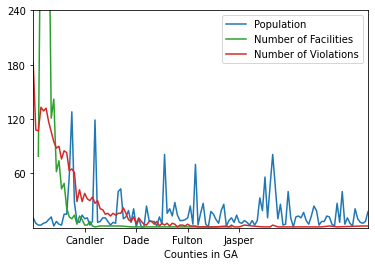

In [ ]:
x = pd.DataFrame(water['Counties Served'].value_counts())

y = pd.DataFrame(water['PopulationServed Count'].value_counts())
z = pd.DataFrame(water['Number of Facilities'].value_counts())
a = pd.DataFrame(water['Number of Violations'].value_counts())


plt.xlim(0,130)
plt.ylim(0,240)
plt.plot(x.sort_index(axis = 0), label = 'Population')
plt.plot(y.sort_index(axis = 0))
plt.plot(z.sort_index(axis = 0 ), label = 'Number of Facilities')
plt.plot(a.sort_index(axis = 0 ), label = 'Number of Violations')
plt.xticks([20,40,60,80])
plt.yticks([60,120,180,240])
line1 = label= 'line1'

plt.legend()
plt.xlabel("Counties in GA")




plt.show()

# Hypo 5 

In [ ]:
ucmr3_df = pd.read_csv("UCMR3_All.csv")
ucmr3_df


In [ ]:
gapfas = ucmr3_df[ucmr3_df['State'].str.contains('GA')] 
gapfas

In [ ]:
gap =  gapfas.set_index(['PWSID','FacilityID','FacilityName','FacilityWaterType','Contaminant','State']).select_dtypes('number')
gap

In [ ]:
gas = gapfas[ucmr3_df['Contaminant'].str.contains('PF')] 
gas

In [ ]:
x = pd.DataFrame(gas['PWSID'].value_counts())

y = pd.DataFrame(gas['MRL'].value_counts())
plt.xlim(0,5)
plt.ylim(0,240)
plt.plot(x.sort_index(axis = 0), label = 'MRL')
plt.plot(y.sort_index(axis = 0))
plt.legend()
plt.xlabel("Counties in GA")




plt.show()

In [ ]:
gas["PWSName"].hist(bins=150,xrot=90)
plt.xlim(75,100)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1c411a1a-39b3-482a-9f41-b53f24acaa96' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>